In [1]:
from collections import Counter
import os

labels_path = '/home/hanna/course_project/data/TACO/yolo_dataset/train/labels'
all_labels = []

for file in os.listdir(labels_path):
    with open(os.path.join(labels_path, file), 'r') as f:
        for line in f.readlines():
            cls_id = int(line.split()[0])
            all_labels.append(cls_id)

print(Counter(all_labels))

Counter({59: 490, 36: 374, 5: 214, 12: 188, 55: 127, 6: 88, 21: 80, 27: 63, 33: 56, 20: 49, 40: 48, 10: 29, 34: 19, 25: 7, 1: 2})


In [8]:
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
image_dir = Path('/home/hanna/course_project/data/TACO/yolo_dataset/train/images')
label_dir = Path('/home/hanna/course_project/data/TACO/yolo_dataset/train/labels')
class_names = [
    'Clear plastic bottle', 'Glass bottle', 'Drink can', 'Food Can', 'Paper cup',
    'Disposable plastic cup', 'Normal paper', 'Paper bag', 'Plastic film',
    'Single-use carrier bag', 'Plastic straw', 'Plastic lid', 'Battery',
    'Cigarette', 'Food waste'
]


def draw_boxes(image_path, label_path, class_names):
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    print(f"\n🔍 Annotations for {image_path.name}:")
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls_id, x_c, y_c, bw, bh = map(float, line.strip().split())
            x1 = int((x_c - bw / 2) * w)
            y1 = int((y_c - bh / 2) * h)
            x2 = int((x_c + bw / 2) * w)
            y2 = int((y_c + bh / 2) * h)

            # Get class name
            cls_id_int = int(cls_id)
            class_name = class_names[cls_id_int] 
            print(f" - {class_name}: box = ({x1}, {y1}), ({x2}, {y2})")

            # Draw bounding box and label
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, class_name, (x1, max(y1 - 5, 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    return image

# Visualize a few images
sample_images = list(image_dir.glob('*.jpg'))[:5]

for image_path in sample_images:
    label_path = label_dir / (image_path.stem + '.txt')
    if not label_path.exists():
        continue
    image_with_boxes = draw_boxes(image_path, label_path, class_names)
    plt.figure(figsize=(8, 8))
    plt.imshow(image_with_boxes)
    plt.title(image_path.name)
    plt.axis('off')
    plt.show()



🔍 Annotations for batch_12_000090.jpg:


IndexError: list index out of range

In [7]:
from pycocotools.coco import COCO

# Path to annotations
coco_json = '/home/hanna/course_project/data/TACO/data/annotations.json'

# Load COCO dataset
coco = COCO(coco_json)

# Get category names
cats = coco.loadCats(coco.getCatIds())
class_names = [cat['name'] for cat in cats]

# Print class names
print(class_names)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
['Aluminium foil', 'Battery', 'Aluminium blister pack', 'Carded blister pack', 'Other plastic bottle', 'Clear plastic bottle', 'Glass bottle', 'Plastic bottle cap', 'Metal bottle cap', 'Broken glass', 'Food Can', 'Aerosol', 'Drink can', 'Toilet tube', 'Other carton', 'Egg carton', 'Drink carton', 'Corrugated carton', 'Meal carton', 'Pizza box', 'Paper cup', 'Disposable plastic cup', 'Foam cup', 'Glass cup', 'Other plastic cup', 'Food waste', 'Glass jar', 'Plastic lid', 'Metal lid', 'Other plastic', 'Magazine paper', 'Tissues', 'Wrapping paper', 'Normal paper', 'Paper bag', 'Plastified paper bag', 'Plastic film', 'Six pack rings', 'Garbage bag', 'Other plastic wrapper', 'Single-use carrier bag', 'Polypropylene bag', 'Crisp packet', 'Spread tub', 'Tupperware', 'Disposable food container', 'Foam food container', 'Other plastic container', 'Plastic glooves', 'Plastic utensils', 'Pop tab', 'Rope & strings', '

In [12]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = '../data/TACO/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


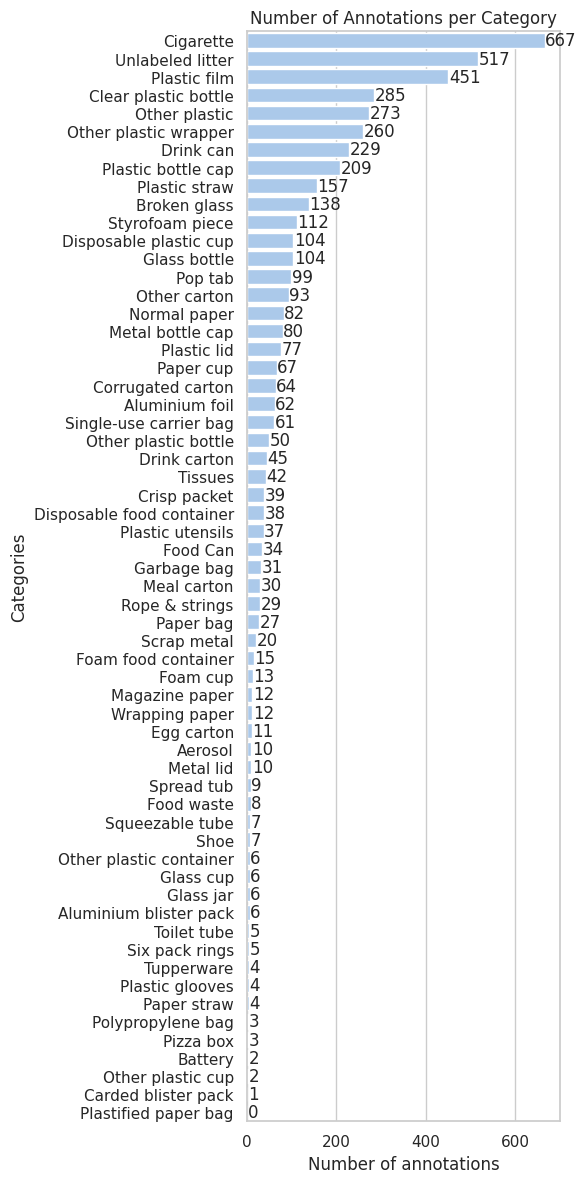

['Cigarette', 'Unlabeled litter', 'Plastic film', 'Clear plastic bottle', 'Other plastic', 'Other plastic wrapper', 'Drink can', 'Plastic bottle cap', 'Plastic straw', 'Broken glass', 'Styrofoam piece', 'Disposable plastic cup', 'Glass bottle', 'Pop tab', 'Other carton']


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count annotations
cat_histogram = np.zeros(nr_cats, dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Convert to DataFrame
df = pd.DataFrame({
    'Categories': cat_names,
    'Number of annotations': cat_histogram
})
df = df.sort_values(by='Number of annotations', ascending=False)

# Plot the histogram
plt.figure(figsize=(6, 12))  # modern way to control figure size
sns.set(style="whitegrid", palette="pastel")

plot = sns.barplot(
    data=df,
    x="Number of annotations",
    y="Categories",
    color="b",
    orient="h"
)

# Optional: Add labels on bars
for p in plot.patches:
    width = p.get_width()
    plot.text(width + 1, p.get_y() + p.get_height()/2,
              f'{int(width)}', va='center')

plt.title("Number of Annotations per Category")
plt.tight_layout()

# Save or show
# plt.savefig("output.png", dpi=300)
plt.show()
top_15_categories = df['Categories'].head(15).tolist()
print(top_15_categories)
